In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

from prep import prep_store_data, prep_germany_power_data

In [2]:
df = prep_store_data()

In [3]:
df

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,21.0,619014,735 SW Military Dr,San Antonio,9,TX,78221,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,December,Sunday,87.57
2017-12-31 00:00:00+00:00,32.0,620840,8503 NW Military Hwy,San Antonio,10,TX,78231,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,December,Sunday,133.44
2017-12-31 00:00:00+00:00,55.0,622666,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,December,Sunday,285.45


In [4]:
daily_sales = df.resample('D').sum()

In [5]:
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)

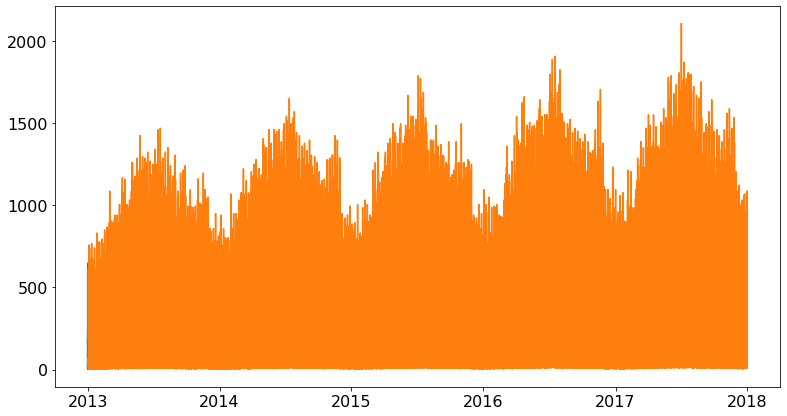

In [6]:
train_size = .70
n = daily_sales.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

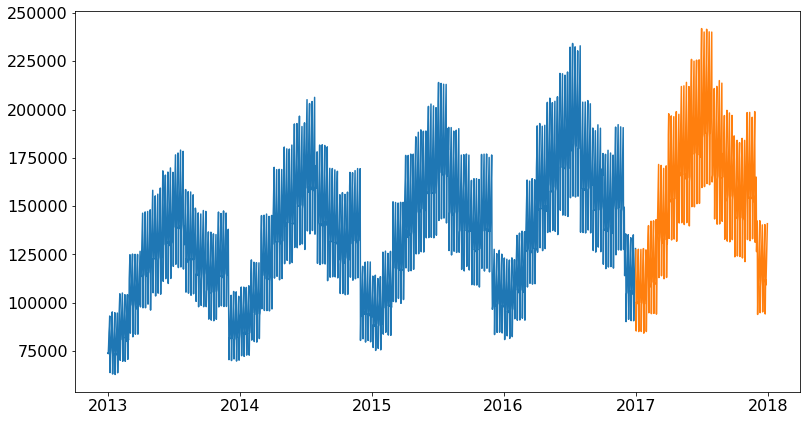

In [7]:
train = daily_sales[:'2016']
test = daily_sales['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [8]:
y = train.sales_total
y.head()

sale_date
2013-01-01 00:00:00+00:00    73844.01
2013-01-02 00:00:00+00:00    73570.58
2013-01-03 00:00:00+00:00    78169.48
2013-01-04 00:00:00+00:00    84467.73
2013-01-05 00:00:00+00:00    87621.85
Freq: D, Name: sales_total, dtype: float64

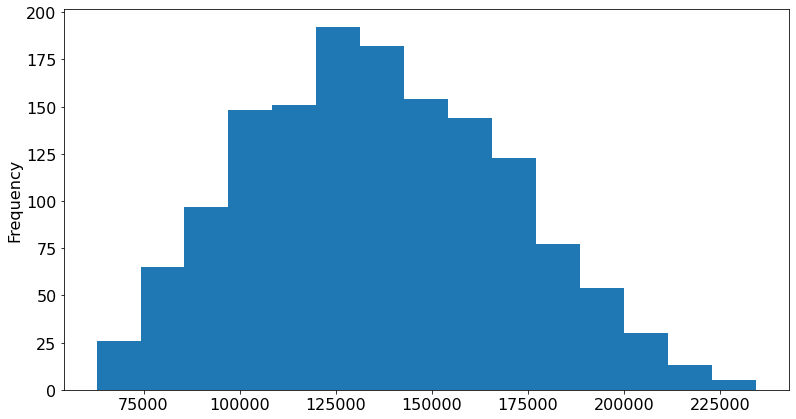

In [9]:
y.plot.hist(bins=15)

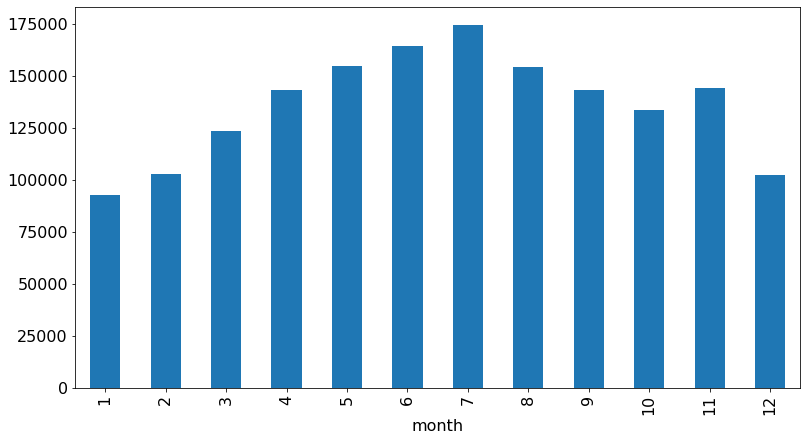

In [10]:
train['month'] = train.index.month

train.groupby('month').sales_total.mean().plot.bar()

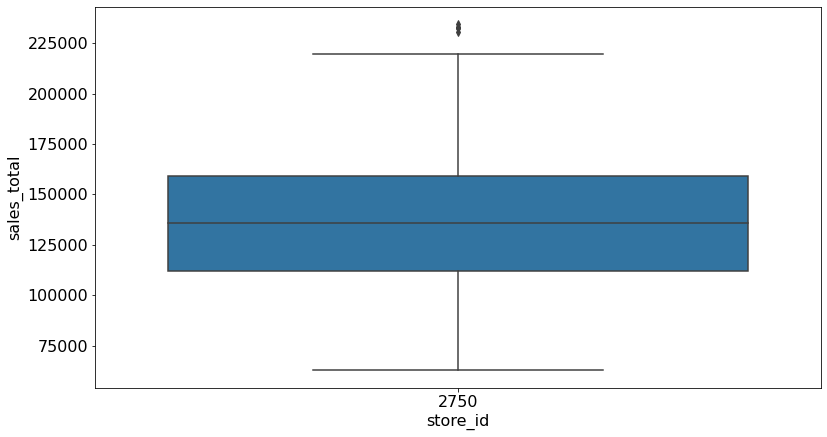

In [11]:
sns.boxplot(data=train, y='sales_total', x='store_id')

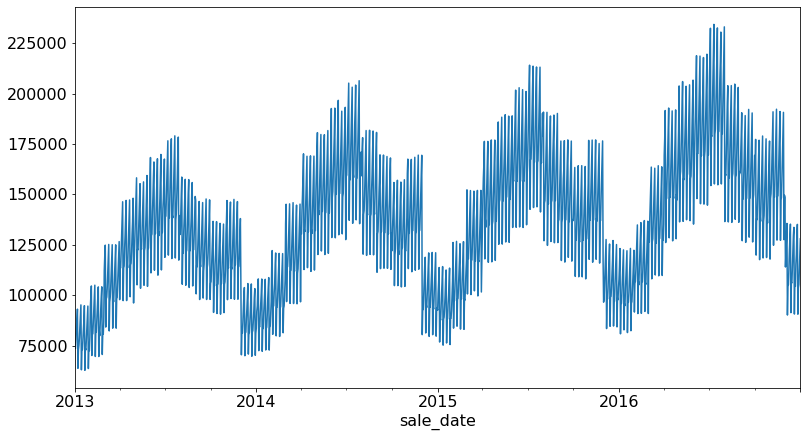

In [12]:
y.plot()

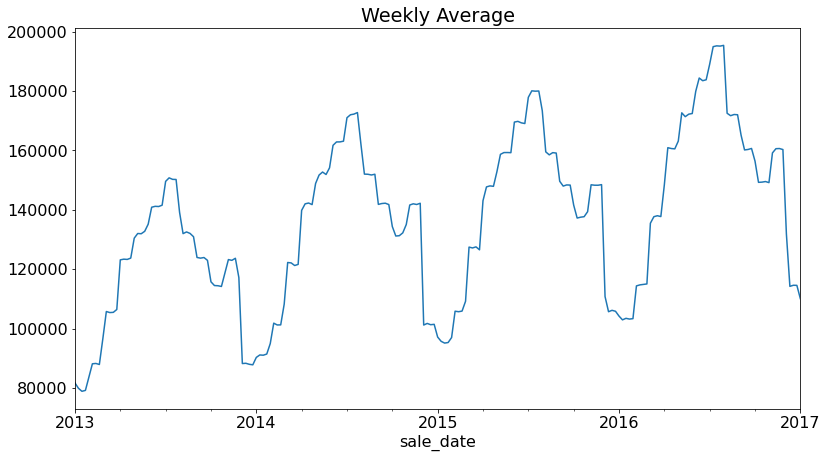

In [13]:
y.resample('W').mean().plot(title='Weekly Average')

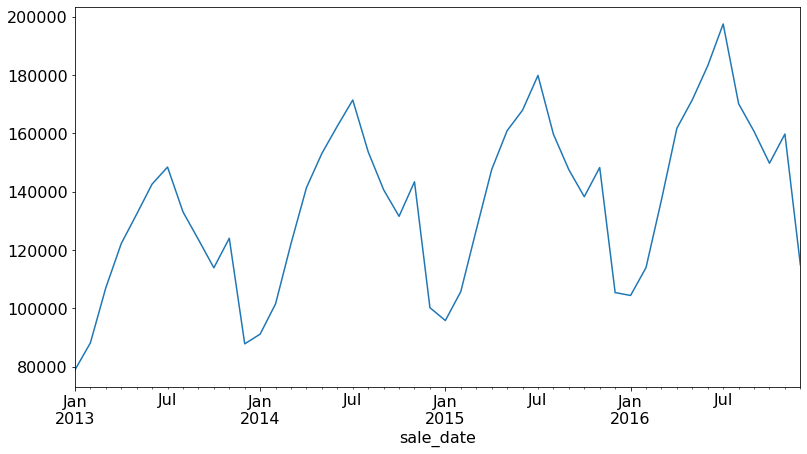

In [14]:
y.resample('M').mean().plot()

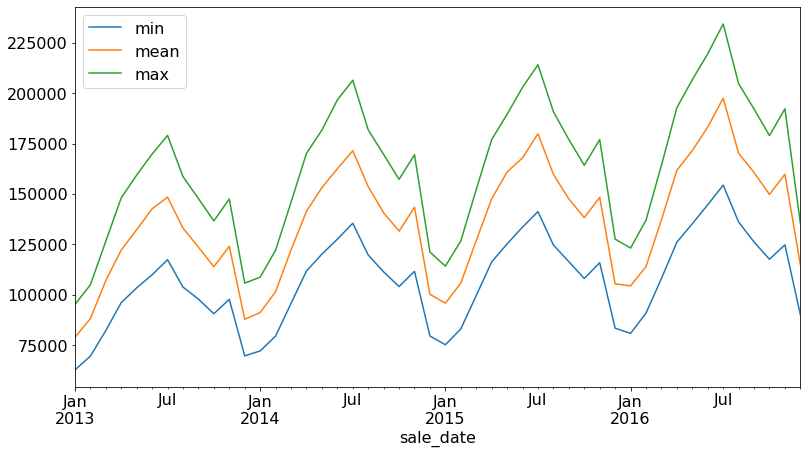

In [15]:
y.resample('M').agg(['min', 'mean', 'max']).plot()

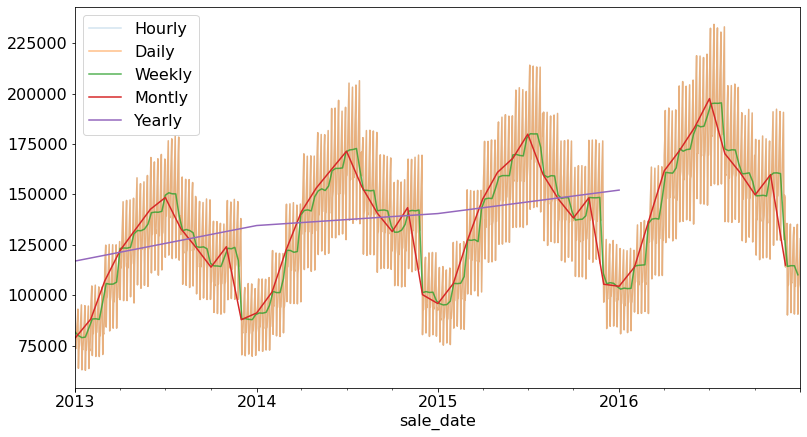

In [16]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()